In [1]:
#Installing the required Python libraries
!pip install pandas nltk textblob transformers torch

  Using cached textblob-0.18.0.post0-py3-none-any.whl.metadata (4.5 kB)
  Using cached transformers-4.46.2-py3-none-any.whl.metadata (44 kB)
  Using cached torch-2.5.1-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached huggingface_hub-0.26.2-py3-none-any.whl.metadata (13 kB)
  Using cached safetensors-0.4.5-cp312-none-win_amd64.whl.metadata (3.9 kB)
  Using cached tokenizers-0.20.3-cp312-none-win_amd64.whl.metadata (6.9 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2024.10.0-py3-none-any.whl.metadata (11 kB)
Using cached textblob-0.18.0.post0-py3-none-any.whl (626 kB)
Using cached transformers-4.46.2-py3-none-any.whl (10.0 MB)
Using cached torch-2.5.1-cp312-cp312-win_amd64.whl (203.0 MB)
Using cached huggingface_hub-0.26.2-py3-none-any.whl (447 kB)
Using cached fsspec-2024.10.0-py3-none-any.whl (179 kB)
Using cached safetensors-0.4.5-cp312-none-win_amd64.whl (286 kB)
Us

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
# Set larger font sizes for all plot elements
plt.rcParams.update({'font.size': 14})

In [3]:
# Load the dataset- a CSV file - with a 'Lemmatized_Comments' column
df = pd.read_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Analysis\data processing\Cleaned_TikTok_comments3.csv')[['Lemmatized_Comments']]

In [4]:
# Display all records that contain a question mark in the 'Lemmatized_Comments' column
question_mark_comments = df[df['Lemmatized_Comments'].str.contains(r'\?', na=False)]
print(question_mark_comments)

                                    Lemmatized_Comments
1                                  throw washer after ?
10    ford safe ? seem like bacteria might issue ? f...
11                     olive oil ? face would break bad
16           peppermint bronners ? ? eye ? ? sketch ? ?
17                                 wait keep ? ? genius
...                                                 ...
2197  last power ? not concern last outweighs concer...
2217                     gorgeouspodemos estar amigas ?
2240  think elf sell china ? brand sell china litera...
2251                                    skin care ? ? ?
2258                   could please share alternative ?

[386 rows x 1 columns]


In [5]:
def is_sustainable_concern(comment):
    sustainable_concern_keywords = ['reusable', 'jar', 'safe', 'rehusable', 'plastic', 'sustainable', 'glass', 'cruelty free', 'refill',
                                   'affordable', 'container', 'refillable', 'material', 'green washing','waste free', 'reusing',
                                   'eco friendly', 'environmentally', ' test animal', 'cruelty free', 'vegan', 'eos', 'crest', 'eczema',
                                   'maybelline', 'wait cerave', 'animal testing', 'animal test', 'elf', 'byoma cf', 'colgate', 'sheseido',
                                   'luminex strip', 'loreal shampoo', 'neutrogena', 'byoma', 'throw all thing away', 'inkey', 'cocokind',  
                                   'test tampon animal', 'roche posay', 'kotex', 'tampax', 'animal oil', 'cerave', 'chemical', 'cetaphil', 
                                   'aveeno recommend change', 'fragrance','fair trade', 'zero waste', 'murad', 'bad face wash', 'natural skincare',
                                    'recycling', 'packaging', 'recycle', 'recyclable', 'recycled',  'green washed', 'alternative', 'formula'
                                   'greenwashing', 'biodegradable', 'safe', 'wasting', 'ingredient', 'ethically sourced', 'ethical sourcing', 'mica',
                                   'sukin okay', 'cost',  'expensive', 'waste money'
                           ]
    
    if '?' in comment:
        lower_comment = comment.lower()
        return any(phrase in lower_comment for phrase in sustainable_concern_keywords)
    
    return False

df['is_sustainable_concern'] = df['Lemmatized_Comments'].apply(is_sustainable_concern)

In [6]:
# Apply the curiosity detection function
df['is_sustainable_concern'] = df['Lemmatized_Comments'].apply(is_sustainable_concern)

# Filter rows where 'is_sustainable_concern' is True
sustainable_concern_comments = df[df['is_sustainable_concern']]

# Print the original comments marked as curiosity
print("Comments identified as curiosity-related:")
print(sustainable_concern_comments['Lemmatized_Comments'])  

# print a sample for review
print("\nSample of curiosity-related comments:")
print(sustainable_concern_comments[['Lemmatized_Comments', 'is_sustainable_concern']].head(10))

Comments identified as curiosity-related:
10      ford safe ? seem like bacteria might issue ? f...
22      try reusable cotton pad but rough skin hurt ba...
25                                  whered cute jar lid ?
26                 completely safe ? no bacteria growth ?
28        wash rehusable round ? find pretty tricky clean
                              ...                        
2101    aside initiative mention whats best way youve ...
2149                                        alternative ?
2178          affordable set spraypowder recommendation ?
2240    think elf sell china ? brand sell china litera...
2258                     could please share alternative ?
Name: Lemmatized_Comments, Length: 161, dtype: object

Sample of curiosity-related comments:
                                   Lemmatized_Comments  is_sustainable_concern
10   ford safe ? seem like bacteria might issue ? f...                    True
22   try reusable cotton pad but rough skin hurt ba...               

In [7]:
def is_self_concern(comment):
    self_concern_keywords = ['oil', 'name', 'bacteria', 'sensitive skin', 'acne prone skin',  'sensitive skin', 'brand', 'oily skin'
                             'company', 'damage', 'niacinamide', 'effective', 'skin type', 'dry skin', 'vitamin c', 'lasting power']
    
    if '?' in comment:
        lower_comment = comment.lower()
        return any(phrase in lower_comment for phrase in self_concern_keywords)
    
    return False

df['is_self_concern'] = df['Lemmatized_Comments'].apply(is_self_concern)

In [8]:
# Apply the self_concern detection function
df['is_self_concern'] = df['Lemmatized_Comments'].apply(is_self_concern)

# Filter rows where 'is_self_concern' is True
self_concern_comments = df[df['is_self_concern']]

# Print the original comments marked as self_concern
print("Comments identified as skeptical-related:")
print(self_concern_comments['Lemmatized_Comments'])  

# print a sample for reviewing
print("\nSample of skeptical-related comments:")
print(self_concern_comments[['Lemmatized_Comments', 'is_self_concern']].head(10))

Comments identified as skeptical-related:
10      ford safe ? seem like bacteria might issue ? f...
11                       olive oil ? face would break bad
18      ever try use mineral oil instead olive oil ? c...
22      try reusable cotton pad but rough skin hurt ba...
26                 completely safe ? no bacteria growth ?
                              ...                        
1875                                        think brand ?
1959                              ingredient like brand ?
2138                            think rare beauty brand ?
2148    people bio correct concealer oily skin crease ...
2240    think elf sell china ? brand sell china litera...
Name: Lemmatized_Comments, Length: 76, dtype: object

Sample of skeptical-related comments:
                                  Lemmatized_Comments  is_self_concern
10  ford safe ? seem like bacteria might issue ? f...             True
11                   olive oil ? face would break bad             True
18  ever try us

In [9]:
#Classify Question Marks
#combine filters
def classify_question(comment):
    if is_sustainable_concern(comment):
        return 'Trust'
    elif is_self_concern(comment):
        return 'Content'
    elif '?' in comment:
        return 'Neutral'
    return 'None'

df['question_type'] = df['Lemmatized_Comments'].apply(classify_question)

In [10]:
# Split each entry in the 'Lemmatized_Comments' column into lists of words
df['Lemmatized_Comments'] = df['Lemmatized_Comments'].apply(lambda x: x.split() if isinstance(x, str) else x)

# Verify that each document is now a list of tokens
print(df['Lemmatized_Comments'].iloc[0])
print(type(df['Lemmatized_Comments'].iloc[0]))

['jojoba', 'oil', 'instead', 'olive', 'oil', 'jojoba', 'mean', 'cleanse', 'pore', 'wont', 'clog', 'skin']
<class 'list'>


In [11]:
# 1- Emotion Lexicon Analysis
#Use the NRC Emotion Lexicon for detecting emotions in the comments
from nltk.corpus import wordnet
from collections import defaultdict
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\paris\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
#Updated Code to Handle Encoding
# Specify the file path
nrc_file_path = 'D:/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'

# Load NRC Emotion Lexicon with the correct encoding
emotion_dict = defaultdict(list)
try:
    with open(nrc_file_path, 'r', encoding='utf-8') as f:  # Try utf-8 first
        for line in f:
            word, emotion, presence = line.strip().split('\t')
            if int(presence) == 1:
                emotion_dict[word].append(emotion)
except UnicodeDecodeError:
    with open(nrc_file_path, 'r', encoding='latin-1') as f:  # Fall back to latin-1
        for line in f:
            word, emotion, presence = line.strip().split('\t')
            if int(presence) == 1:
                emotion_dict[word].append(emotion)

In [13]:
# Define a supplementary lexicon
supplementary_lexicon = {
    'great': ['joy'],
    'awesome': ['joy'],
    'amazing': ['joy'],
    'wow': ['joy'],
    'thank': ['trust'],
    'oh' : ['joy'],
    'hun' : ['joy'],
    'like' : ['joy'],
    'fantastic' : ['joy'],
    'stunning' : ['joy'],
    'ohh' : ['joy'],
    'ooh' : ['joy'],
    'ah' : ['joy'],
    'yahooo' : ['joy'],
    'yay' : ['joy'],
    'omg' : ['joy'],
    'yes' : ['trust'],
    'best' : ['trust'],
    'cutie' : ['joy'],
    'nice' : ['joy'],
    'loveeee' : ['joy'],
    'loveee' : ['joy'],
    'talented' : ['trust'],
    'incredible' : ['joy'],
    'insightful' : ['trust'],
    'curious' : ['anticipation'],
    'not wait' : ['trust'],
    'cant wait' : ['trust'],
    'need' : ['curiosity'],
    'not help' : ['sadness'],
    'purchase' : ['trust'],
    'buy' : ['trust'],
    'leapingbunnycertified': ['trust'],
    'crueltyfree' : ['trust'],
    'naturalbeauty' : ['trust'],
    'zerowaste' : ['trust'],  
    'plasticfree' : ['trust'], 
    'lowwastelifestyle' : ['trust'], 
    'ecofriendly' : ['trust'], 
    'sustainable' : ['trust'],
    'gogreen' : ['trust'],
    'zerowastelifestyle' : ['trust'], 
    'wastefree' : ['trust'],
    'crueltyfree' : ['trust'],
    'vegan': ['trust'],
    'zerowastestore' : ['trust'], 
    'refillrevolution' : ['trust'],
    'refillablemakeup' : ['trust'], 
    'refillablecosmetics' : ['trust'], 
    'zerowastemakeup' : ['trust'],
    'zerowastecosmetics' : ['trust'],
    'lowwastemakeup' : ['trust'],
    'lowwastecosmetics' : ['trust'], 
    'refillableskincare' : ['trust'], 
    'zerowasteskincare' : ['trust'],
    'cleanbeauty' : ['trust'],
    'refillable' : ['trust'], 
    'sustainablemakeup' : ['trust'],
    'ecofriendlymakeup' : ['trust'],
    'lowwasteliving' : ['trust'],
    'zerowasteliving' : ['trust'], 
    'veganbeauty' : ['trust'],
    'refillablebeauty' : ['trust'], 
    'sustainablebeauty' : ['trust'], 
    'ecobeauty' : ['trust'], 
    'refill' : ['trust'],
    'sustainableliving' : ['trust'], 
    'consciousconsumer' : ['trust'],
    'organicskincare' : ['trust'],
    'sustainableskincare' : ['trust'],
    'preservativefree' : ['trust'],
    'palmoilfreeskincare' : ['trust'], 
    'fairtradeskincare' : ['trust'],
    'compostableskincare' : ['trust'],
    'compostablelipbalm' : ['trust'],
    'ecofriendlyskincare' : ['trust'],
    'crueltyfreeskincare' : ['trust'],
    'circularbeauty' : ['trust'],
    'ethical' : ['trust'],
    'natural' : ['trust'],
    'nowaste' : ['trust'],
    'sustainablepackaging' : ['trust'],
    'economiacircular' : ['trust'],
    'circularity' : ['trust'],
    'recycledmaterials' : ['trust'],
    'ecofriendlyproducts' : ['trust'],
    'ecofriendlyliving' : ['trust'],
    'sustainablebrand' : ['trust'],
    'sustainablebusiness' : ['trust'],
    'sustainabilitymatters' : ['trust'],
    'preserve' : ['trust'],
    'climate' : ['trust'],
    'environment' : ['trust'],
    'earthsustainable' : ['trust'],
    'compostable' : ['trust'],
    'none plastic' : ['trust'],
    'sustainability' : ['trust'],
    'reuse' : ['trust'],
    'reusable' : ['trust'],
    'support' : ['trust'],
    'conservation' : ['trust'],
    'but' : ['sadness'],
    'thanks': ['trust']
}

# Combine with the NRC Lexicon
for word, emotions in supplementary_lexicon.items():
    if word not in emotion_dict:
        emotion_dict[word] = emotions

In [14]:
# Analyze emotions in each comment
def get_emotions(Lemmatized_Comments):
    emotions = []
    for token in Lemmatized_Comments:
        token_emotions = emotion_dict.get(token.lower(), [])
        emotions.extend(token_emotions)
    return emotions

df['lexicon_emotions'] = df['Lemmatized_Comments'].apply(get_emotions)


In [15]:
# Summarize emotions
df['lexicon_emotions_summary'] = df['lexicon_emotions'].apply(lambda x: {emotion: x.count(emotion) for emotion in set(x)})

In [16]:
# Mapping NRC emotions to custom categories
emotion_mapping = {
    'joy': 'Joyful',
    'surprise': 'Joyful',
    'trust': 'Trust',
    'positive': 'Joyful',
    'gratitude': 'Trust',
    'negative': 'Anger',  # Map all negative to anger
    'sadness': 'Disappointment',  # Sadness becomes disappointed
    'anger': 'Anger',
    'fear': 'Disappointment',  # Fear becomes worried
    'anticipation': 'Neutral',  # Skeptical as anticipation
    'disgust': 'Anger',  # Map disgust to anger
    'neutral' : 'Neutral',
    'curiosity' : 'Content'
    
}

In [17]:
#Apply Mapping Only to Existing Emotions
# Function to map emotions based on the dictionary
def map_emotions(emotion_list, mapping):
    if not emotion_list:  # If no emotions detected, return as is
        return emotion_list
    return [mapping.get(emotion, emotion) for emotion in emotion_list] 

In [18]:
# Apply the mapping
df['mapped_emotions'] = df['lexicon_emotions_summary'].apply(lambda x: map_emotions(x, emotion_mapping))

# Display the results
print(df[['Lemmatized_Comments', 'lexicon_emotions_summary', 'mapped_emotions']])

                                    Lemmatized_Comments  \
0     [jojoba, oil, instead, olive, oil, jojoba, mea...   
1                             [throw, washer, after, ?]   
2     [magic, makeup, eraser, towel, last, year, nee...   
3                               [makeup, eraser, cloth]   
4     [esthetician, try, almond, oil, jojoba, oil, i...   
...                                                 ...   
2254                                        [love, elf]   
2255                                       [thank, yes]   
2256                                         [pacifica]   
2257  [elf, concealer, forever, chemical, stay, away...   
2258             [could, please, share, alternative, ?]   

                               lexicon_emotions_summary  \
0                    {'positive': 1, 'anticipation': 1}   
1                                                    {}   
2                                      {'curiosity': 1}   
3                                                    {}

In [19]:
# Function to combine mapped emotions and question type with specific conditions
def combine_emotions_and_questions(row):
    # Only consider question_type if it's 'Curiosity' or 'Anticipation'
    if row['question_type'] in ['Trust', 'Content', 'Neutral']:
        # Include mapped emotions if present
        if row['mapped_emotions']:
            return f" {', '.join(row['mapped_emotions'])} , {row['question_type']}"
        else:
            return row['question_type']
    # If question_type is not 'Curiosity' or 'Anticipation', only include mapped emotions
    elif row['mapped_emotions']:
        return f" {', '.join(row['mapped_emotions'])}"
    # If neither condition is met, return a default message
    else:
        return {}

In [20]:
#Apply this function to create the new column
df['combined_analysis0'] = df.apply(combine_emotions_and_questions, axis=1)

# Display the results
print(df[['Lemmatized_Comments', 'lexicon_emotions_summary', 'mapped_emotions', 'combined_analysis0']])

                                    Lemmatized_Comments  \
0     [jojoba, oil, instead, olive, oil, jojoba, mea...   
1                             [throw, washer, after, ?]   
2     [magic, makeup, eraser, towel, last, year, nee...   
3                               [makeup, eraser, cloth]   
4     [esthetician, try, almond, oil, jojoba, oil, i...   
...                                                 ...   
2254                                        [love, elf]   
2255                                       [thank, yes]   
2256                                         [pacifica]   
2257  [elf, concealer, forever, chemical, stay, away...   
2258             [could, please, share, alternative, ?]   

                               lexicon_emotions_summary  \
0                    {'positive': 1, 'anticipation': 1}   
1                                                    {}   
2                                      {'curiosity': 1}   
3                                                    {}

In [21]:
# Inspect the data type of the column
print(df['combined_analysis0'].apply(type).value_counts())

# Print sample rows with their type
print(df['combined_analysis0'].head(10))

combined_analysis0
<class 'str'>     1793
<class 'dict'>     466
Name: count, dtype: int64
0                                      Joyful, Neutral
1                                              Neutral
2                                              Content
3                                                   {}
4                                                   {}
5                                                Trust
6                                                Trust
7     Disappointment, Trust, Anger, Anger, Disappoi...
8     Disappointment, Trust, Neutral, Joyful, Anger...
9     Trust, Joyful, Neutral, Joyful, Disappointmen...
Name: combined_analysis0, dtype: object


In [22]:
# Function to normalize the column
def normalize_to_list(value):
    if isinstance(value, str):  # If value is a string, split it into a list
        return [item.strip() for item in value.split(',')]
    elif isinstance(value, dict):  # If value is a dictionary, extract the keys (or values if needed)
        return list(value.keys())
    else:  # If value is neither, return an empty list
        return []

# Normalize the column
df['normalized_analysis'] = df['combined_analysis0'].apply(normalize_to_list)

In [23]:
# Function to remove duplicates, normalize case, and trim whitespace
# Deduplication function
def remove_duplicates(emotions):
    if isinstance(emotions, list):
        return list(dict.fromkeys(emotions))  # Remove duplicates while preserving order
    return emotions

# Apply the deduplication function
df['NRC_analysis'] = df['normalized_analysis'].apply(remove_duplicates)

# Display the DataFrame to verify changes
print(df[['combined_analysis0', 'normalized_analysis', 'NRC_analysis']])

                                 combined_analysis0  \
0                                   Joyful, Neutral   
1                                           Neutral   
2                                           Content   
3                                                {}   
4                                                {}   
...                                             ...   
2254   Joyful, Anger, Anger, Disappointment, Joyful   
2255                                          Trust   
2256                                             {}   
2257                   Disappointment, Anger, Anger   
2258         Trust, Joyful, Joyful, Neutral , Trust   

                                 normalized_analysis  \
0                                  [Joyful, Neutral]   
1                                          [Neutral]   
2                                          [Content]   
3                                                 []   
4                                                 []   
...

In [24]:
# Save emotion summaries to a CSV file
df.to_csv(r'C:\Users\paris\OneDrive\thesis\collect data\lexicon_emotions_TikTok26.csv', index=False)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the frequency of each emotion in the 'NRC_analysis' column
emotion_counts = df['NRC_analysis'].explode().value_counts().reset_index()
emotion_counts.columns = ['Emotion', 'Count']

# Creating the visualization
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Count', y='Emotion', data=emotion_counts, palette='viridis')

# Removing unnecessary elements for a cleaner look
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Emotion', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the plot to a file
plt.savefig('nrc_emotion_analysis_TikTok26.png')
plt.close()  # Close the plot display to save memory

# Display a success message
print("Bar chart for NRC analysis saved successfully as 'nrc_emotion_analysis_plot.png'.")


C:\Users\paris\AppData\Local\Temp\ipykernel_17532\4135252376.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Count', y='Emotion', data=emotion_counts, palette='viridis')


Bar chart for NRC analysis saved successfully as 'nrc_emotion_analysis_plot.png'.


In [27]:
# 2- Emotion Analysis: Pre-trained Model Analysis

#Use a pre-trained transformer model (DistilBERT-based model) from the Hugging Face Transformers library:

from transformers import pipeline

# Load a pre-trained emotion classification model
emotion_pipeline = pipeline('text-classification', model='bhadresh-savani/distilbert-base-uncased-emotion')

# Apply model to each comment
df['model_emotions'] = df['Lemmatized_Comments'].apply(lambda x: emotion_pipeline(x))

In [28]:
# Check the type of data in model_emotions
print(df['model_emotions'].apply(type).value_counts())

model_emotions
<class 'list'>    2259
Name: count, dtype: int64


In [29]:
# Mapping for renaming emotions
emotion_rename_mapping = {
    'joy': 'Joyful',  # Map joy to Joyful
    'surprise': 'Joyful', # Map surprise to Joyful
    'trust': 'Trust',
    'positive': 'Joyful', # Map all positive to Joyful
    'gratitude': 'Trust', # Map gratitude to Trust
    'negative': 'Anger',  # Map all negative to Anger
    'sadness': 'Disappointment',  # Sadness becomes Disappointment
    'anger': 'Anger',
    'fear': 'Disappointment',  # Fear becomes Disappointment
    'anticipation': 'Neutral',  # Map anticipation to Neutral
    'disgust': 'Anger',  # Map disgust to anger
    'neutral' : 'Neutral',
    'love': 'Trust' # Map love to Trust   
}

# Function to rename and aggregate emotions
def rename_and_aggregate_emotions(emotion_list):
    if isinstance(emotion_list, list):
        renamed_emotions = {}
        for emotion_dict in emotion_list:
            if isinstance(emotion_dict, dict) and "label" in emotion_dict and "score" in emotion_dict:
                # Rename emotion based on mapping
                new_emotion = emotion_rename_mapping.get(emotion_dict["label"], emotion_dict["label"])
                # Aggregate scores for renamed emotions
                renamed_emotions[new_emotion] = renamed_emotions.get(new_emotion, 0) + emotion_dict["score"]
        return renamed_emotions
    return {}

# Apply the function to the column
df['renamed_emotions'] = df['model_emotions'].apply(rename_and_aggregate_emotions)

# Display the updated DataFrame
print(df[['model_emotions', 'renamed_emotions']])

                                         model_emotions  \
0     [{'label': 'joy', 'score': 0.4655363857746124}...   
1     [{'label': 'anger', 'score': 0.545544445514679...   
2     [{'label': 'joy', 'score': 0.6289324164390564}...   
3     [{'label': 'anger', 'score': 0.414993673563003...   
4     [{'label': 'fear', 'score': 0.3881051242351532...   
...                                                 ...   
2254  [{'label': 'love', 'score': 0.9171563982963562...   
2255  [{'label': 'joy', 'score': 0.978950560092926},...   
2256    [{'label': 'anger', 'score': 0.36312136054039}]   
2257  [{'label': 'anger', 'score': 0.609913825988769...   
2258  [{'label': 'fear', 'score': 0.3235937356948852...   

                                       renamed_emotions  
0     {'Joyful': 4.088815867900848, 'Anger': 3.51342...  
1     {'Anger': 1.7920793890953064, 'Joyful': 0.2714...  
2     {'Joyful': 1.2021642923355103, 'Anger': 3.1098...  
3                         {'Anger': 1.5316428244113922}  
4

In [30]:
print(df['Lemmatized_Comments'].apply(type).value_counts())  # Should mostly be <class 'str'>
print(df['renamed_emotions'].apply(type).value_counts())  

Lemmatized_Comments
<class 'list'>    2259
Name: count, dtype: int64
renamed_emotions
<class 'dict'>    2259
Name: count, dtype: int64


In [31]:
# Function to adjust detected emotions based on rules
def rule_based_emotion_adjustment(comment_words, emotion_scores):
    # Ensure inputs are valid
    if not isinstance(comment_words, list) or not isinstance(emotion_scores, dict):
        return emotion_scores

    #  rule: Override anger if positive words are present
    positive_keywords = ['perfect', 'love', 'awesome', 'great', 'excellent', 'amazing', 'wow', 'oh', 'hun', 'like', 'fantastic', 'stunning', 'ohh', 'ooh', 'ah', 'yahooo', 'yay', 'omg',  'cutie', 'nice', 'loveeee', 'loveee', 'talented']
    if 'Anger' in emotion_scores and any(word in comment_words for word in positive_keywords):
        # Reduce anger and boost joy
        emotion_scores['Anger'] = max(0, emotion_scores['Anger'] - 1.0)
        emotion_scores['Joyful'] = emotion_scores.get('Joyful', 0) + 1.0

    return emotion_scores

# Apply the function
df['adjusted_emotions'] = df.apply(
    lambda row: rule_based_emotion_adjustment(row['Lemmatized_Comments'], row['renamed_emotions']),
    axis=1
)

In [32]:
# Function to adjust detected emotions based on rules
def rule_based_emotion_adjustment(comment_words, emotion_scores):
    
    if not isinstance(comment_words, list) or not isinstance(emotion_scores, dict):
        return emotion_scores

    #  rule: Override anger if positive words are present
    positive_keywords_1 = ['thank', 'best', 'yes', 'insightful', 'wait', 'need', 'purchase', 'buy', 
    'leapingbunnycertified', 'crueltyfree', 'naturalbeauty', 'zerowaste', 'plasticfree', 'lowwastelifestyle', 
    'ecofriendly', 'sustainable',  'gogreen', 'zerowastelifestyle', 'wastefree', 'vegan', 'zerowastestore',
    'refillrevolution', 'refillablemakeup', 'refillablecosmetics', 'zerowastemakeup', 'zerowastecosmetics', 
    'lowwastemakeup', 'lowwastecosmetics', 'refillableskincare', 'zerowasteskincare', 'cleanbeauty', 'refillable', 
    'sustainablemakeup', 'ecofriendlymakeup', 'lowwasteliving', 'zerowasteliving', 'veganbeauty', 'refillablebeauty', 
    'sustainablebeauty', 'ecobeauty', 'refill', 'organicskincare',  'compostableskincare', 'fairtradeskincare', 
    'crueltyfreeskincare',  'ethical', 'sustainablepackaging', 'recycledmaterials', 'environment', 'earthsustainable', 
    'sustainability', 'reuse', 'support', 'conservation']
    if 'Anger' in emotion_scores and any(word in comment_words for word in positive_keywords_1):
        # Reduce anger and boost trust
        emotion_scores['Anger'] = max(0, emotion_scores['Anger'] - 1.0)
        emotion_scores['Trust'] = emotion_scores.get('Trust', 0) + 1.0

    return emotion_scores

# Apply the function
df['adjusted_emotions'] = df.apply(
    lambda row: rule_based_emotion_adjustment(row['Lemmatized_Comments'], row['renamed_emotions']),
    axis=1
)

In [33]:
# Function to adjust detected emotions based on rules
def rule_based_emotion_adjustment(comment_words, emotion_scores):
    
    if not isinstance(comment_words, list) or not isinstance(emotion_scores, dict):
        return emotion_scores
    # Conditional keywords that influence anger and trust based on a question-mark comment
    conditional_keywords1 = ['right', 'gluten']
    

   # Conditional keywords that influence anger and trust based on a question-mark comment
    conditional_keywords2 = ['ended', 'stock', 'wholesale', 'buy', 'purchase', 'online', 
                             'sustainable ethical', 'back', 'payment']

    # Rule 1: Reduce anger and boost trust for positive keywords
    if 'Anger' in emotion_scores and ('?' in comment_words or any(word in comment_words for word in conditional_keywords1)):
        emotion_scores['Anger'] = max(0, emotion_scores['Anger'] - 1.0)
        emotion_scores['Content'] = emotion_scores.get('Content', 0) + 1.0
         
        
      # Rule 2: Adjust anger and trust for conditional keywords
    if 'Anger' in emotion_scores and ('?' in comment_words or any(word in comment_words for word in conditional_keywords2)):
        emotion_scores['Anger'] = max(0, emotion_scores['Anger'] - 1.0)
        emotion_scores['Trust'] = emotion_scores.get('Trust', 0) + 1.0
    return emotion_scores

# Apply the function to adjust emotions
df['adjusted_emotions'] = df.apply(
    lambda row: rule_based_emotion_adjustment(row['Lemmatized_Comments'], row['renamed_emotions']),
    axis=1
)

    

In [34]:
print(df[['Lemmatized_Comments', 'renamed_emotions', 'adjusted_emotions']])

                                    Lemmatized_Comments  \
0     [jojoba, oil, instead, olive, oil, jojoba, mea...   
1                             [throw, washer, after, ?]   
2     [magic, makeup, eraser, towel, last, year, nee...   
3                               [makeup, eraser, cloth]   
4     [esthetician, try, almond, oil, jojoba, oil, i...   
...                                                 ...   
2254                                        [love, elf]   
2255                                       [thank, yes]   
2256                                         [pacifica]   
2257  [elf, concealer, forever, chemical, stay, away...   
2258             [could, please, share, alternative, ?]   

                                       renamed_emotions  \
0     {'Joyful': 4.088815867900848, 'Anger': 3.51342...   
1     {'Anger': 0, 'Joyful': 0.27149829268455505, 'C...   
2     {'Joyful': 1.2021642923355103, 'Anger': 2.1098...   
3                         {'Anger': 1.5316428244113922}

In [35]:
# Function to extract dominant emotion labels with specific conditions

def extract_emotion_labels(renamed_emotions):
    if isinstance(renamed_emotions, dict):  # Ensure input is a dictionary
        # If both 'joy' or 'trust' and 'anger' exist, exclude 'anger'
        if 'Anger' in renamed_emotions and ('Joyful' in renamed_emotions or 'Trust' in renamed_emotions):
            # Remove 'anger' and return the rest of the emotions
            filtered_emotions = {emotion for emotion in renamed_emotions if emotion != 'Anger'}
        else:
            # Keep all emotions if conditions aren't met
            filtered_emotions = set(renamed_emotions.keys())
        return filtered_emotions
    return set()  # Return an empty set if the input is not a dictionary

# Apply the function to create a new column
df['DistilBERT_emotion_labels'] = df['renamed_emotions'].apply(extract_emotion_labels)

# Display the DataFrame to verify changes
print(df[['renamed_emotions', 'DistilBERT_emotion_labels']].head())


                                    renamed_emotions DistilBERT_emotion_labels
0  {'Joyful': 4.088815867900848, 'Anger': 3.51342...                  {Joyful}
1  {'Anger': 0, 'Joyful': 0.27149829268455505, 'C...  {Joyful, Trust, Content}
2  {'Joyful': 1.2021642923355103, 'Anger': 2.1098...           {Joyful, Trust}
3                      {'Anger': 1.5316428244113922}                   {Anger}
4  {'Disappointment': 0.3881051242351532, 'Anger'...  {Disappointment, Joyful}


In [36]:
# Print unique types in the renamed_emotions column
print(df['DistilBERT_emotion_labels'].apply(type).value_counts())

DistilBERT_emotion_labels
<class 'set'>    2259
Name: count, dtype: int64


In [37]:
# Save emotion summaries to a CSV file
df.to_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Pre-trained Model Analysis_tiktok26.csv', index=False)

In [42]:
# Count the frequency of each emotion in the 'DistilBERT_emotion_labels' column
emotion_counts = df['DistilBERT_emotion_labels'].explode().value_counts().reset_index()
emotion_counts.columns = ['Emotion', 'Count']

# Creating the visualization
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Count', y='Emotion', data=emotion_counts, palette='viridis')

# Removing unnecessary elements for a cleaner look
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Emotion', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the plot to a file
plt.savefig('distilbert_emotion_labels_plot.png')
plt.close()  # Close the plot display to save memory

# Display a success message
print("Bar chart for DistilBERT emotion labels saved successfully as 'distilbert_emotion_labels_plot.png'.")


C:\Users\paris\AppData\Local\Temp\ipykernel_17532\912797049.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Count', y='Emotion', data=emotion_counts, palette='viridis')


Bar chart for DistilBERT emotion labels saved successfully as 'distilbert_emotion_labels_plot.png'.


In [39]:
# 3- Emotion Analysis with RoBERTa

# Load the RoBERTa-based emotion classification model
emotion_pipeline = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)



C:\Programs\Python\Python312\Lib\site-packages\transformers\pipelines\text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [43]:
# Function to analyze emotions using the RoBERTa model
def analyze_emotions(Lemmatized_Comments):
    try:
        # Get the model's emotion predictions
        results = emotion_pipeline(Lemmatized_Comments)
        # Extract emotions and scores
        emotion_scores = {result['label']: result['score'] for result in results[0]}
        return emotion_scores
    except Exception as e:
        print(f"Error processing comment: {Lemmatized_Comments}")
        return {}


In [44]:
# Apply emotion analysis to each comment
df['emotion_scores'] = df['Lemmatized_Comments'].apply(analyze_emotions)

In [45]:
# Define the mapping for renaming emotions
emotion_rename_mapping = {
    'joy': 'Joyful', # Map joy to Joyful
    'surprise': 'Joyful', # Map surprise to Joyful
    'trust': 'Trust',
    'positive': 'Joyful', # Map posistive to Joyful
    'gratitude': 'Trust', # Map gratitude to Trust
    'negative': 'Anger',  # Map all negative to Anger
    'sadness': 'Disappointment',  # Sadness becomes Disappointment
    'anger': 'Anger',
    'fear': 'Disappointment',  # Fear becomes Disappointment
    'anticipation': 'Neutral',  # anticipation as Neutral
    'disgust': 'Anger',  # Map disgust to Anger
    'neutral' : 'Neutral', 
    'love': 'Trust', # Map love to Trust
    
}

# Function to rename emotions
def rename_emotions3(emotion_scores):
    if isinstance(emotion_scores, dict):  # Ensure input is a dictionary
        renamed_scores = {}
        for emotion, score in emotion_scores.items():
            # Map the emotion to the new name using the mapping
            renamed_emotion3 = emotion_rename_mapping.get(emotion, emotion)  # Default to the original emotion if not in mapping
            renamed_scores[renamed_emotion3] = renamed_scores.get(renamed_emotion3, 0) + score
        return renamed_scores
    return {}

# Apply the renaming function
df['renamed_emotions3'] = df['emotion_scores'].apply(rename_emotions3)

# Display the updated DataFrame
print(df[['emotion_scores', 'renamed_emotions3']].head())

                                      emotion_scores  \
0  {'anger': 0.0023008217103779316, 'disgust': 0....   
1  {'anger': 0.9274728298187256, 'disgust': 0.007...   
2  {'anger': 0.029301241040229797, 'disgust': 0.0...   
3  {'anger': 0.006257856730371714, 'disgust': 0.0...   
4  {'anger': 0.022525368258357048, 'disgust': 0.1...   

                                   renamed_emotions3  
0  {'Anger': 0.004296369384974241, 'Disappointmen...  
1  {'Anger': 0.9347901050932705, 'Disappointment'...  
2  {'Anger': 0.045414065942168236, 'Disappointmen...  
3  {'Anger': 0.016241840552538633, 'Disappointmen...  
4  {'Anger': 0.127241937443614, 'Disappointment':...  


In [46]:
# Extract dominant emotions with a threshold condition
def get_dominant_emotions_with_threshold(renamed_emotions3, threshold=0.1):
    if not renamed_emotions3 or not isinstance(renamed_emotions3, dict):
        return "unknown"
    # Filter emotions with scores greater than the threshold
    RoBERTa_emotion = [emotion for emotion, score in renamed_emotions3.items() if score > threshold]
    # If no emotion meets the threshold, return "unknown"
    return RoBERTa_emotion if RoBERTa_emotion else "unknown"

# Apply the function to extract dominant emotions
df['RoBERTa_emotion'] = df['renamed_emotions3'].apply(get_dominant_emotions_with_threshold)

# Display results
print(df[['Lemmatized_Comments', 'renamed_emotions3', 'RoBERTa_emotion']].head())


                                 Lemmatized_Comments  \
0  [jojoba, oil, instead, olive, oil, jojoba, mea...   
1                          [throw, washer, after, ?]   
2  [magic, makeup, eraser, towel, last, year, nee...   
3                            [makeup, eraser, cloth]   
4  [esthetician, try, almond, oil, jojoba, oil, i...   

                                   renamed_emotions3  \
0  {'Anger': 0.004296369384974241, 'Disappointmen...   
1  {'Anger': 0.9347901050932705, 'Disappointment'...   
2  {'Anger': 0.045414065942168236, 'Disappointmen...   
3  {'Anger': 0.016241840552538633, 'Disappointmen...   
4  {'Anger': 0.127241937443614, 'Disappointment':...   

                    RoBERTa_emotion  
0                 [Joyful, Neutral]  
1                           [Anger]  
2                 [Joyful, Neutral]  
3                         [Neutral]  
4  [Anger, Disappointment, Neutral]  


In [47]:
# Load the RoBERTa-based sentiment classification model
sentiment_pipeline = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment", return_all_scores=True)

# Define the mapping from model labels to sentiment categories
label_mapping = {
    'LABEL_0': 'negative',
    'LABEL_1': 'neutral',
    'LABEL_2': 'positive'
}

# Function to detect polarity with label mapping
def detect_polarity(comment):
    try:
        # Get sentiment predictions
        results = sentiment_pipeline(comment)
        # Map the labels to sentiment categories
        sentiment_scores = {label_mapping[result['label']]: result['score'] for result in results[0]}
        return sentiment_scores
    except Exception as e:
        print(f"Error processing comment: {comment}")
        return {}

# Apply the sentiment analysis to the DataFrame
df['polarity_scores'] = df['Lemmatized_Comments'].apply(detect_polarity)

C:\Programs\Python\Python312\Lib\site-packages\transformers\pipelines\text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [48]:
# Function to get the dominant polarity
def get_dominant_polarity(polarity_scores):
    if isinstance(polarity_scores, dict) and polarity_scores:
        return max(polarity_scores, key=polarity_scores.get)  # Get the key with the highest score
    return "unknown"

# Apply the function to get the dominant polarity
df['RoBERTa_polarity'] = df['polarity_scores'].apply(get_dominant_polarity)

# Display the updated DataFrame
print(df[['Lemmatized_Comments', 'polarity_scores', 'RoBERTa_polarity']].head())

                                 Lemmatized_Comments  \
0  [jojoba, oil, instead, olive, oil, jojoba, mea...   
1                          [throw, washer, after, ?]   
2  [magic, makeup, eraser, towel, last, year, nee...   
3                            [makeup, eraser, cloth]   
4  [esthetician, try, almond, oil, jojoba, oil, i...   

                                     polarity_scores RoBERTa_polarity  
0  {'negative': 0.18060682713985443, 'neutral': 0...          neutral  
1  {'negative': 0.25526443123817444, 'neutral': 0...          neutral  
2  {'negative': 0.09307744354009628, 'neutral': 0...          neutral  
3  {'negative': 0.17437411844730377, 'neutral': 0...          neutral  
4  {'negative': 0.2538180947303772, 'neutral': 0....          neutral  


In [49]:
df.to_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Roberta_Emotion_Analysis_tiktok26.csv', index=False)

In [51]:

# Count the frequency of each emotion in the 'RoBERTa_emotion' column
emotion_counts = df['RoBERTa_emotion'].explode().value_counts().reset_index()
emotion_counts.columns = ['Emotion', 'Count']

# Creating the visualization
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Count', y='Emotion', data=emotion_counts, palette='viridis')

# Removing unnecessary elements for a cleaner look
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Emotion', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the plot to a file
plt.savefig('roberta_emotion_analysis_plot.png')
plt.close()  # Close the plot display to save memory

# Display a success message
print("Bar chart for RoBERTa emotion analysis saved successfully as 'roberta_emotion_analysis_plot.png'.")


C:\Users\paris\AppData\Local\Temp\ipykernel_17532\3353416009.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Count', y='Emotion', data=emotion_counts, palette='viridis')


Bar chart for RoBERTa emotion analysis saved successfully as 'roberta_emotion_analysis_plot.png'.


In [49]:


# Create a PDF for the Polarity Histogram
with PdfPages('roberta_polarity_histogram.pdf') as pdf:
    plt.figure(figsize=(8, 6))  # Adjusted figure size
    df['RoBERTa_polarity'].value_counts().plot(kind='bar', color='blue', edgecolor='black')
    plt.xlabel('Polarity')
    plt.ylabel('Frequency')
    plt.grid(True)  # Added grid for better readability
    plt.tight_layout()
    pdf.savefig()  # Save the figure into the pdf
    plt.close()  # Close the figure

# Create a PDF for the Sentiment Category Bar Chart
with PdfPages('roberta_sentiment_category_bar_chart.pdf') as pdf:
    plt.figure(figsize=(8, 6))  # Adjusted figure size
    df['RoBERTa_polarity'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'], edgecolor='black')  # Added edge color
    plt.xlabel('Polarity')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.grid(axis='y')  # Added grid on the y-axis
    pdf.savefig()  # Save the figure into the pdf
    plt.close()  # Close the figure

print("Two PDF files have been created with enhanced clarity: 'roberta_polarity_histogram.pdf' and 'roberta_sentiment_category_bar_chart.pdf'.")


Two PDF files have been created with enhanced clarity: 'roberta_polarity_histogram.pdf' and 'roberta_sentiment_category_bar_chart.pdf'.


In [56]:
# Aggregate emotion counts for NRC Emotion Lexicon
from collections import Counter

# Aggregate NRC Emotion Counts
nrc_emotion_counts = Counter()
for emotions in df['NRC_analysis']:
    nrc_emotion_counts.update(emotions)

# Convert Counter to pandas Series for visualization
nrc_emotion_counts = pd.Series(nrc_emotion_counts)

print("NRC Emotion Counts:")
print(nrc_emotion_counts)

NRC Emotion Counts:
Joyful            1207
Neutral            656
Content            112
Trust              968
Disappointment     567
Anger              622
dtype: int64


In [57]:
# Aggregate DistilBERT Emotion Counts
Dbert_emotion_counts = df['DistilBERT_emotion_labels'].value_counts()
Dbert_emotion_counts = pd.Series(Dbert_emotion_counts)

print("DBERT Emotion Counts:")
print(Dbert_emotion_counts)

DBERT Emotion Counts:
DistilBERT_emotion_labels
{Joyful}                                    682
{Disappointment, Joyful}                    405
{Joyful, Trust}                             291
{Anger}                                     186
{Joyful, Trust, Disappointment}             176
{Joyful, Trust, Content}                    171
{Joyful, Trust, Content, Disappointment}    139
{Anger, Disappointment}                      73
{Trust, Content}                             45
{Disappointment, Trust, Content}             36
{Trust}                                      25
{Disappointment, Trust}                      10
{Disappointment}                             10
{Joyful, Content, Disappointment}             5
{Joyful, Content}                             3
{Anger, Content}                              2
Name: count, dtype: int64


In [58]:
print("NRC Emotion Counts:")
print(nrc_emotion_counts)

print("\nDistilBERT Emotion Counts:")
print(Dbert_emotion_counts)

NRC Emotion Counts:
Joyful            1207
Neutral            656
Content            112
Trust              968
Disappointment     567
Anger              622
dtype: int64

DistilBERT Emotion Counts:
DistilBERT_emotion_labels
{Joyful}                                    682
{Disappointment, Joyful}                    405
{Joyful, Trust}                             291
{Anger}                                     186
{Joyful, Trust, Disappointment}             176
{Joyful, Trust, Content}                    171
{Joyful, Trust, Content, Disappointment}    139
{Anger, Disappointment}                      73
{Trust, Content}                             45
{Disappointment, Trust, Content}             36
{Trust}                                      25
{Disappointment, Trust}                      10
{Disappointment}                             10
{Joyful, Content, Disappointment}             5
{Joyful, Content}                             3
{Anger, Content}                              2
Name: c

In [59]:
# Convert keys to strings in nrc_emotion_counts
nrc_emotion_counts = {str(k): v for k, v in nrc_emotion_counts.items()}

# Convert keys to strings in bert_emotion_counts
Dbert_emotion_counts = {str(k): v for k, v in Dbert_emotion_counts.items()}

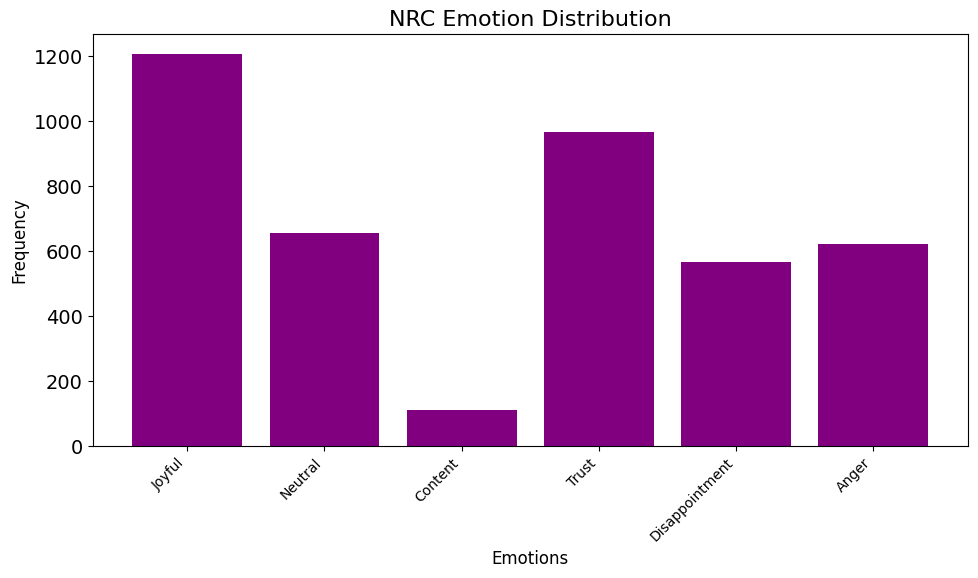

In [60]:
# Set larger font sizes for all plot elements
plt.rcParams.update({'font.size': 14})

# Convert to pandas Series
nrc_emotion_counts = pd.Series(nrc_emotion_counts)
Dbert_emotion_counts = pd.Series(Dbert_emotion_counts)

# Plot NRC Emotion Lexicon

# Flatten the `deduplicated_analysis` column to aggregate all emotions
all_emotions = [emotion for emotions in df['NRC_analysis'] for emotion in emotions]
emotion_counts = Counter(all_emotions)

# Prepare data for the bar chart
emotions, counts = zip(*emotion_counts.items())
# Create the bar chart
plt.figure(figsize=(10, 6))
#nrc_emotion_counts.sort_values().plot(kind='bar', color='skyblue')
plt.bar(emotions, counts, color='purple')
plt.title('NRC Emotion Distribution', fontsize=16)
plt.xlabel('Emotions', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels
plt.tight_layout()
plt.show()




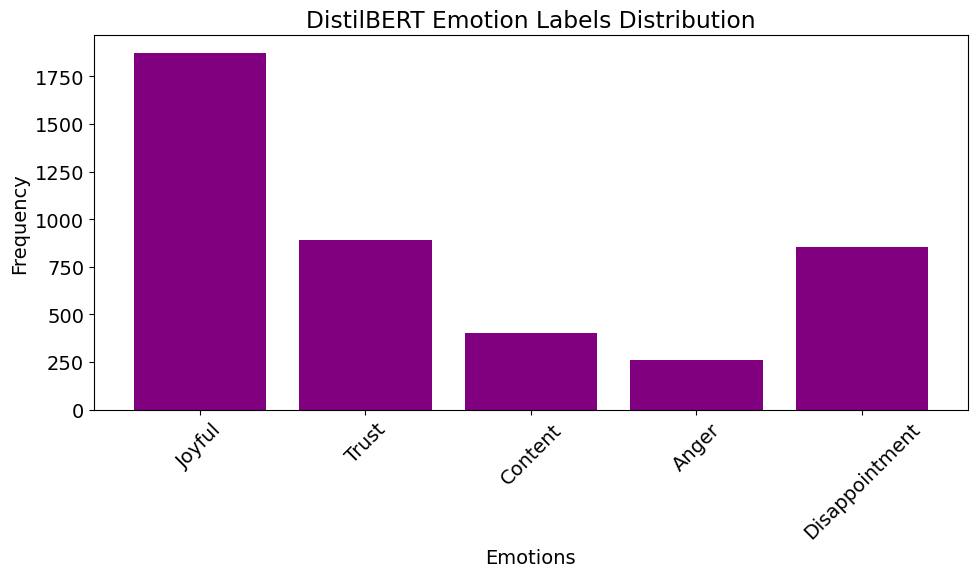

In [61]:
#for DistilBERT
# Flatten the `emotion_labels` column and count the occurrences of each emotion
all_emotions = [emotion for emotions in df['DistilBERT_emotion_labels'] for emotion in emotions]
emotion_counts = Counter(all_emotions)

# Convert to lists for plotting
emotions, counts = zip(*emotion_counts.items())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(emotions, counts, color='purple')
plt.title('DistilBERT Emotion Labels Distribution')
plt.ylabel('Frequency')
plt.xlabel('Emotions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


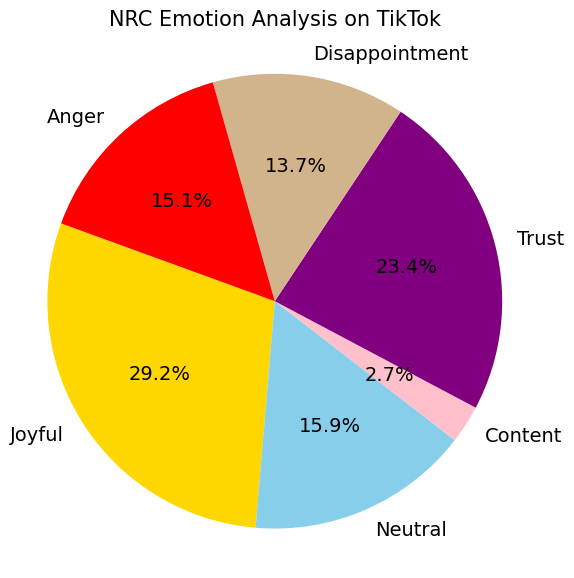

In [66]:
# Flatten the `deduplicated_analysis` column to aggregate all emotions
all_emotions = [emotion for emotions in df['NRC_analysis'] for emotion in emotions]
emotion_counts = Counter(all_emotions)

# Prepare data for the pie chart
emotions, counts = zip(*emotion_counts.items())

# Custom colors
custom_colors = {
    'Joyful': 'gold',
    'Trust': 'purple',
    'Content': 'pink',
    'Neutral': 'skyblue',
    'Discontent': 'gray',
    'Disappointment': '#D2B48C',  # Light brown, tan
    'Anger': 'red'
}

# Map colors to emotions
colors = [custom_colors[emotion] for emotion in emotions]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=emotions, autopct='%1.1f%%', startangle=160, colors=colors)
plt.title('NRC Emotion Analysis on TikTok', fontsize=15, fontweight='normal')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()


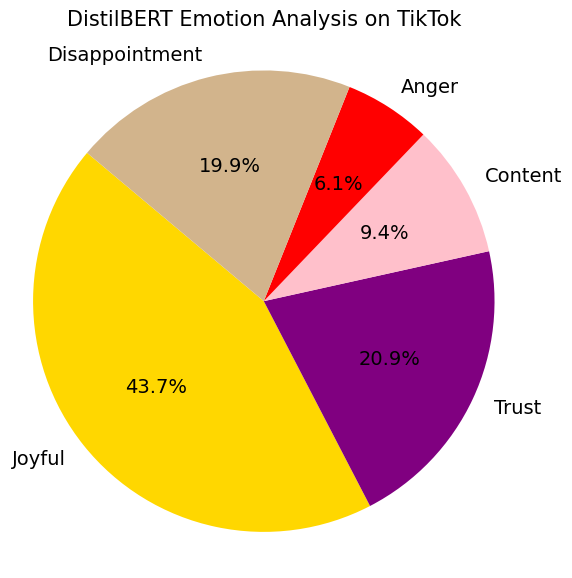

In [65]:
# Plot pie chart for DistilBERT

# Flatten the `deduplicated_analysis` column to aggregate all emotions
all_emotions = [emotion for emotions in df['DistilBERT_emotion_labels'] for emotion in emotions]
emotion_counts = Counter(all_emotions)

# Prepare data for the pie chart
emotions, counts = zip(*emotion_counts.items())

# Custom colors
custom_colors = {
    'Joyful': 'gold',
    'Trust': 'purple',
    'Content': 'pink',
    'Neutral': 'skyblue',
    'Discontent': 'gray',
    'Disappointment': '#D2B48C',  # Light brown, tan
    'Anger': 'red'
}

 #Map colors to emotions
colors = [custom_colors[emotion] for emotion in emotions]


plt.figure(figsize=(6, 6))
plt.pie(counts, labels=emotions, autopct='%1.1f%%', startangle=140, colors= colors)
plt.title('DistilBERT Emotion Analysis on TikTok', fontsize=15, fontweight='normal')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [55]:
!pip install wordcloud

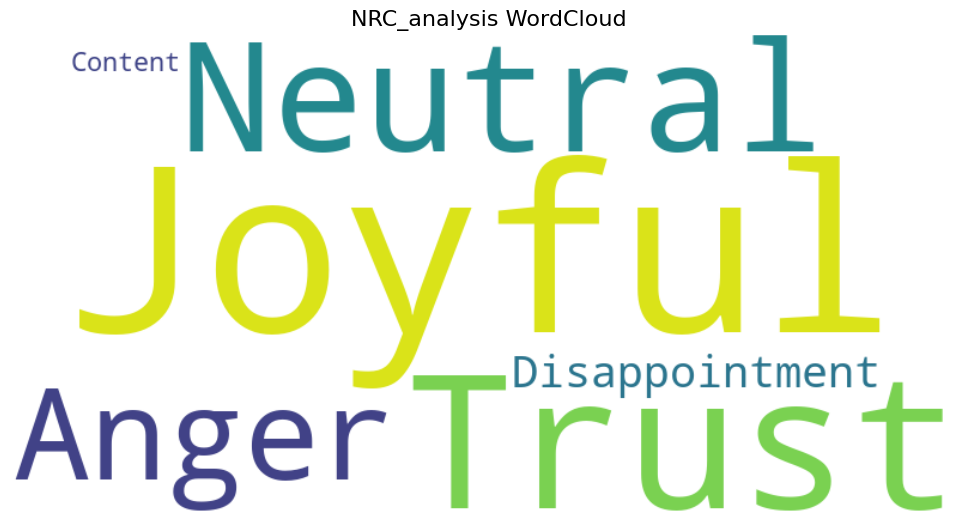

In [61]:
from wordcloud import WordCloud


# Generate word cloud for NRC
# Flatten the `deduplicated_analysis` column to aggregate all emotions
all_emotions = [emotion for emotions in df['NRC_analysis'] for emotion in emotions]
emotion_counts = Counter(all_emotions)

# Generate the WordCloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis'
).generate_from_frequencies(emotion_counts)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('NRC_analysis WordCloud', fontsize=16)
plt.tight_layout()
plt.show()


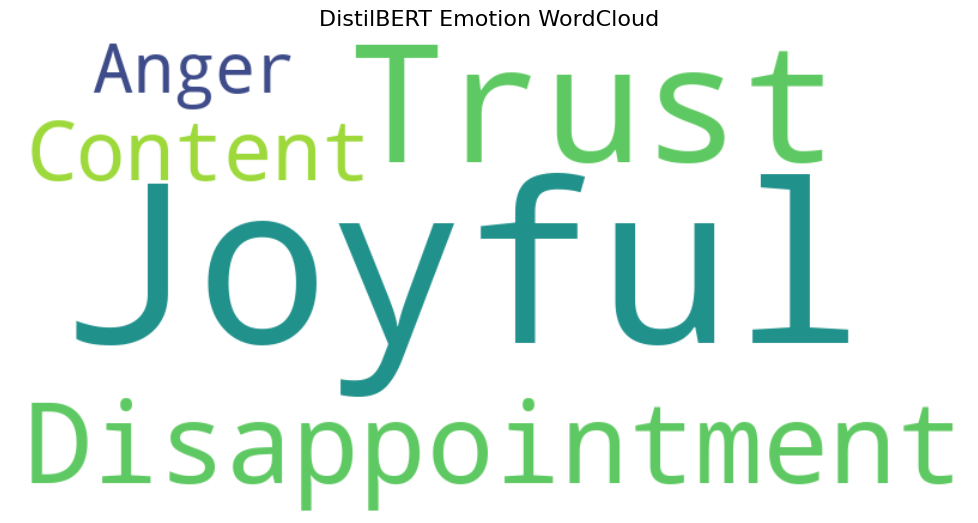

In [62]:
# Generate word cloud for DistilBERT
# Flatten the `emotion_labels` column to aggregate all emotions
all_emotions = [emotion for emotions in df['DistilBERT_emotion_labels'] for emotion in emotions]
emotion_counts = Counter(all_emotions)

# Generate the WordCloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis'
).generate_from_frequencies(emotion_counts)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('DistilBERT Emotion WordCloud', fontsize=16)
plt.tight_layout()
plt.show()

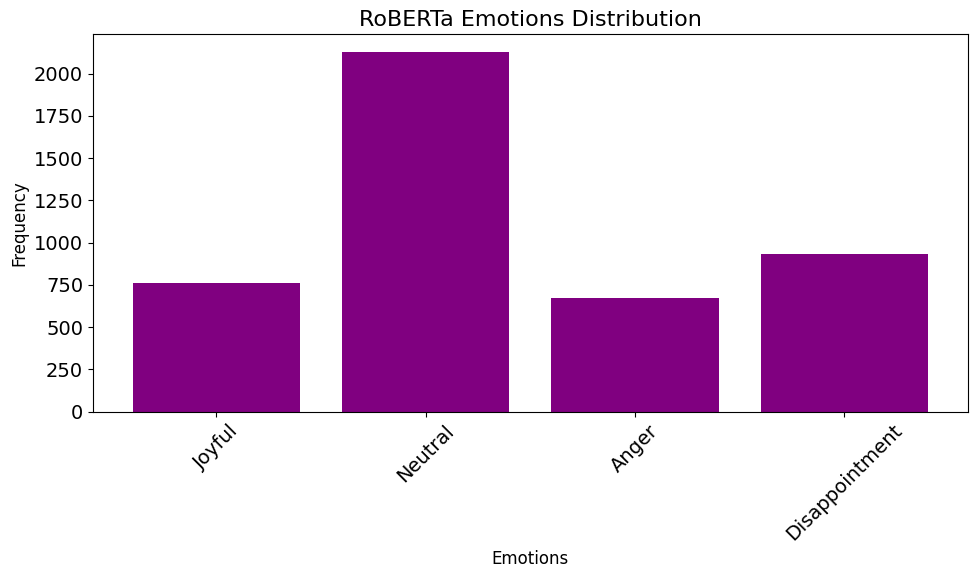

In [64]:
# Count the occurrences of each emotion
emotion_counts = df['RoBERTa_emotion'].value_counts()
polarity_counts = df['RoBERTa_polarity'].value_counts()

import matplotlib.pyplot as plt
from collections import Counter

# Flatten the `dominant_emotion` column to aggregate all emotions
all_emotions = [emotion for emotions in df['RoBERTa_emotion'] if isinstance(emotions, list) for emotion in emotions]
emotion_counts = Counter(all_emotions)

# Flatten the `dominant_polarity` column
all_polarities = df['RoBERTa_polarity']
polarity_counts = Counter(all_polarities)

# Bar chart for emotions
plt.figure(figsize=(10, 6))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color='purple')
plt.title('RoBERTa Emotions Distribution', fontsize=16)
plt.xlabel('Emotions', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



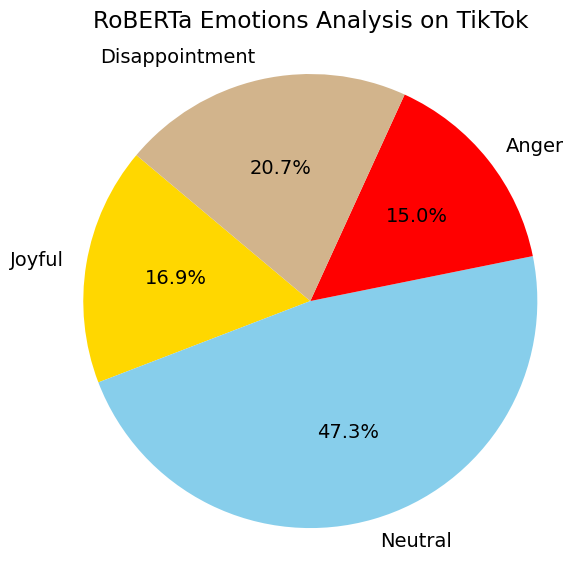

In [69]:

# Prepare data for the pie chart
emotions, counts = zip(*emotion_counts.items())

# Custom colors
custom_colors = {
    'Joyful': 'gold',
    'Trust': 'purple',
    'Content': 'pink',
    'Neutral': 'skyblue',
    'Discontent': 'gray',
    'Disappointment': '#D2B48C',  # Light brown, tan
    'Anger': 'red'
}

 #Map colors to emotions
colors = [custom_colors[emotion] for emotion in emotions]

# Pie chart for emotions
plt.figure(figsize=(6, 6))
plt.pie(emotion_counts.values(), labels=emotion_counts.keys(), autopct='%1.1f%%', startangle=140, colors= colors)
plt.title('RoBERTa Emotions Analysis on TikTok')
plt.axis('equal')
plt.tight_layout()
plt.show()



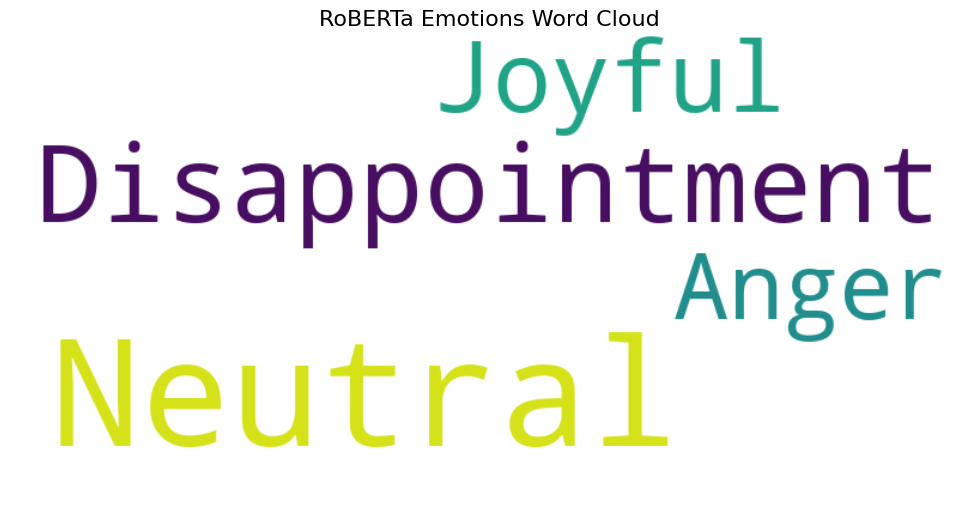

In [66]:
# Generate WordCloud for `dominant_emotion`

# WordCloud for emotions
emotion_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(emotion_counts)

plt.figure(figsize=(10, 6))
plt.imshow(emotion_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('RoBERTa Emotions Word Cloud', fontsize=16)
plt.tight_layout()
plt.show()

